## Prepare mesh

In [1]:
!gmsh mesh.geo -2 >& /dev/null
!convert_msh.py mesh.msh mesh.xdmf
!convert_msh.py mesh.msh mesh_boundary.xdmf line

## Solution preparation

Import BeamImpedance2D module

In [2]:
import logging
import bi2d
from bi2d.materials import vacuum, beam, steel, copper, titanium
import numpy as np

Assign material indices

In [3]:
beam.index = 1
vacuum.index = 2
steel.index = 3
copper.index = 4
titanium.index = 5

Setup mesh and materials

In [4]:
m = bi2d.Mesh("mesh.xdmf", "mesh_boundary.xdmf")
mc = bi2d.MaterialMap(m, [beam, vacuum])

Configure solution

In [5]:
solution = bi2d.Solution(mc, Hcurl_order=2, H1_order=2)

Enable info level logging

In [6]:
solution.logger.setLevel(logging.INFO)

## Solve and visualize fields

Solve and visualize the fields for one frequency point

In [7]:
solution.get_z([1e5], beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[steel, copper, titanium])

INFO:bi2d.solution:Solving for f=1.00e+05, β=0.10


array([[ 1.00000000e+05,  2.35772059e-03, -1.64893525e+01]])

`sum_fields` function allows us to summate rotational and irrotational fields for visualization

In [8]:
solution.sum_fields()
solution.save("solution.xdmf")

Use `paraview solution.xdmf` command to visualize solution from desktop. Note, that `paraview` needs both `solution.xdmf` and `solution.h5` files.

## Calculate monopole impedance

Calculate impedance in frequency range and save the results

In [9]:
solution.logger.setLevel(logging.WARNING)

In [10]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 34s, sys: 4.99 s, total: 2min 39s
Wall time: 2min 40s


In [11]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 44s, sys: 5.34 s, total: 2min 49s
Wall time: 2min 49s


## Plot monopole impedance

In [12]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

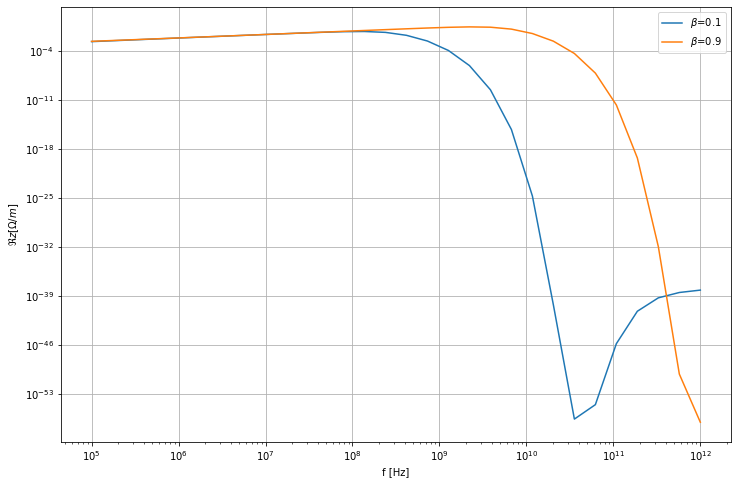

In [13]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Re{z} [\Omega/m]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

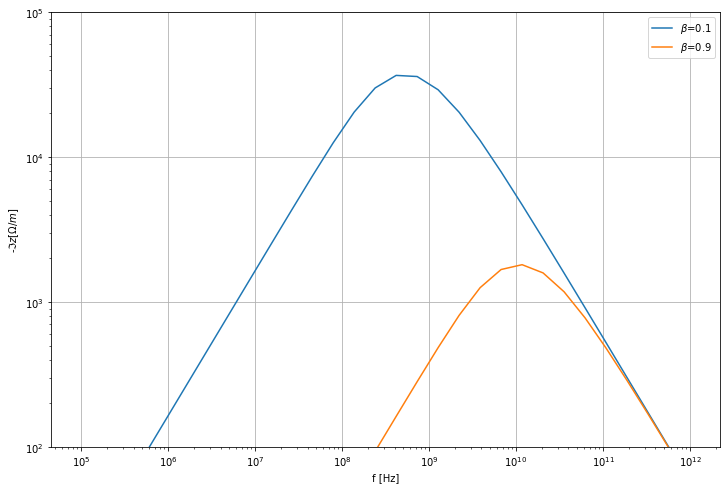

In [14]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.ylim((1e2, 1e5))
pylab.xlabel("f [Hz]")
pylab.ylabel(r"-$\Im{z} [\Omega/m]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

## Calculate dipole impedance

In [15]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 45s, sys: 5.38 s, total: 2min 50s
Wall time: 2min 50s


In [16]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 37s, sys: 5.12 s, total: 2min 43s
Wall time: 2min 43s


## Plot dipole impedance

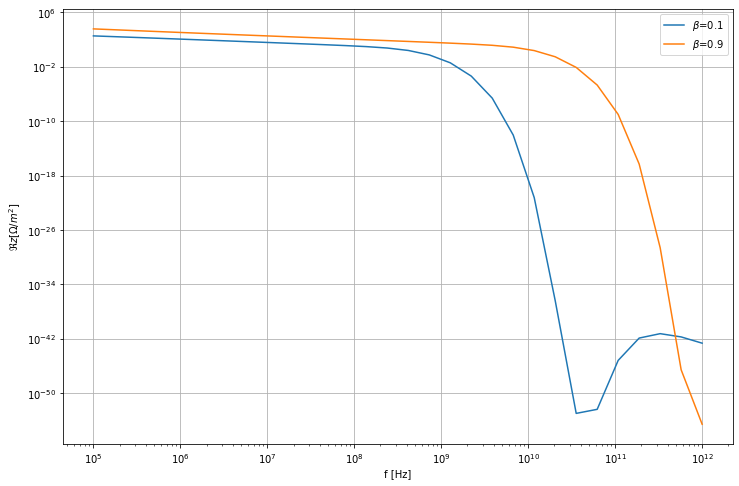

In [17]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Re{z} [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

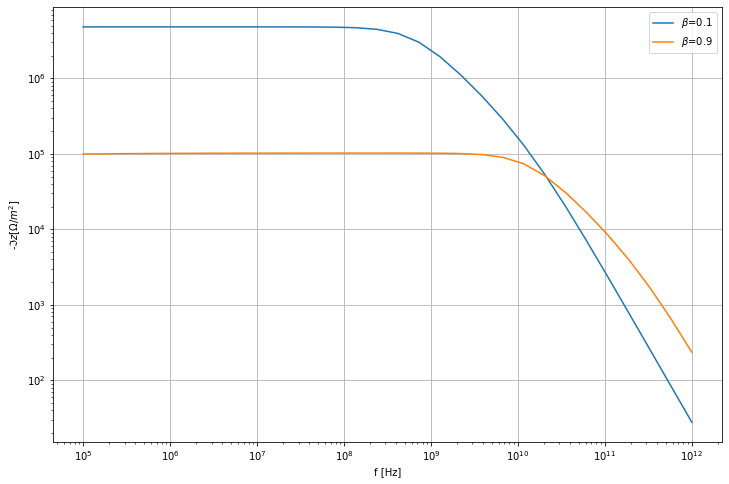

In [18]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"-$\Im{z} [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

In [19]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 32s, sys: 4.92 s, total: 2min 37s
Wall time: 2min 37s


In [20]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[steel, copper, titanium])

CPU times: user 2min 33s, sys: 4.8 s, total: 2min 37s
Wall time: 2min 37s


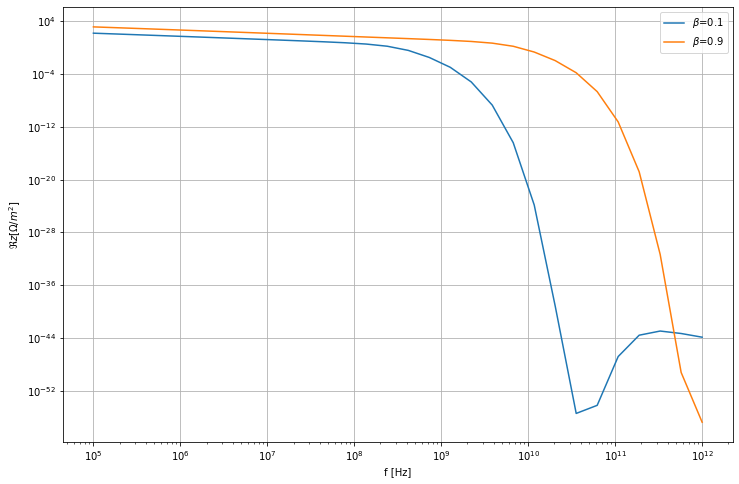

In [21]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"$\Re{z} [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

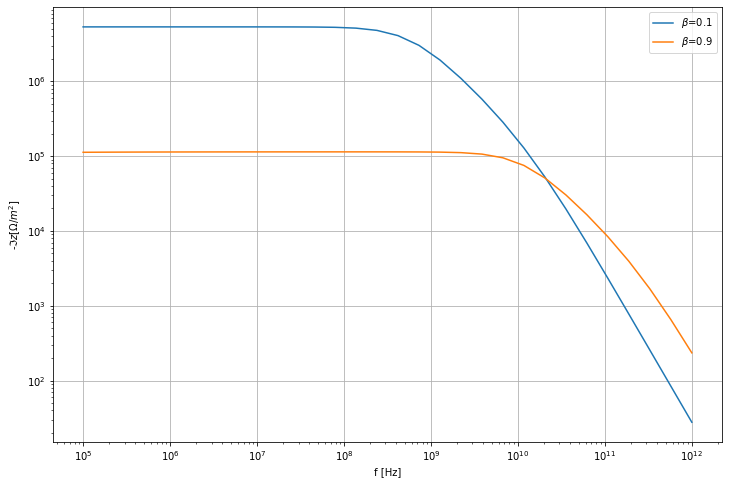

In [22]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f [Hz]")
pylab.ylabel(r"-$\Im{z} [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()